#                                   Exploraty Data Analysis of Salaries in San Francisco city

## Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading Data 

In [4]:
df = pd.read_csv("Salaries.csv")

In [3]:
df.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72008,72009,Kevin Cheng,Commissioner No Benefits,1199.9,0.0,0.0,105.15,1199.90,1305.05,2012,NaN,San Francisco,NaN
72367,72368,Bryce Esch,Junior Clerk,374.79,257.95,0.0,62.9,632.74,695.64,2012,NaN,San Francisco,NaN
56724,56725,Karen Chan,Payroll Clerk,61804.7,1359.65,0.0,29771.93,63164.35,92936.28,2012,NaN,San Francisco,NaN
42637,42638,Don Der,"Electrl Trnst Mech, Asst Sprv",101088.01,8067.82,9109.75,42385.29,118265.58,160650.87,2012,NaN,San Francisco,NaN
16942,16943,DAMON MAYFIELD,TRANSIT OPERATOR,63499.01,7740.52,315.63,NaN,71555.16,71555.16,2011,NaN,San Francisco,NaN
128793,128794,Vivian Barbosa Cansicio,Patient Accounts Clerk,71545.03,2775.87,0.0,29499.12,74320.90,103820.02,2014,NaN,San Francisco,FT
118002,118003,Joseph S Yu,Building Inspector,109163.01,984.81,7834.64,38345.5,117982.46,156327.96,2014,NaN,San Francisco,FT
69489,69490,Rebekah Kaplan,Nurse Midwife,7727.65,0.0,0.0,614.95,7727.65,8342.60,2012,NaN,San Francisco,NaN
20919,20920,NANCY DUBNER,REGISTERED NURSE,55198.97,1136.75,4018.61,NaN,60354.33,60354.33,2011,NaN,San Francisco,NaN
148259,148260,Carmen Z Mcnulty,Special Nurse,357.02,0.00,10.70,83.72,367.72,451.44,2014,NaN,San Francisco,PT


## Data Pre-Processing

In [4]:
# Inforamtion from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
notprovided=df[df['JobTitle']=="Not provided"]
notprovided

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN


In [6]:
df=df.drop([df.index[148646], df.index[148650],df.index[148651],df.index[148652]])
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148640,148641,Charlene D Mccully,Parking Control Officer,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148641,148642,Raphael Marquis Goins,Museum Guard,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148642,148643,Dominic C Marquez,Sign Worker,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148643,148644,Kim Brewer,Parking Control Officer,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [7]:
df.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
5170,5171,NANCY BLISS,MANAGER III,123290.7,0.0,0.0,NaN,123290.70,123290.70,2011,NaN,San Francisco,NaN
130236,130237,Danming Li,Transit Operator,61461.1,4755.36,833.3,31477.85,67049.76,98527.61,2014,NaN,San Francisco,FT
144502,144503,Valerie V Hendricks,Public Svc Aide-Public Works,8629.46,0.00,0.00,86.31,8629.46,8715.77,2014,NaN,San Francisco,PT
31750,31751,MONICA RUIZ,TRANSIT OPERATOR,9629.19,0.0,0.0,NaN,9629.19,9629.19,2011,NaN,San Francisco,NaN
83551,83552,Jonathan A Truppa,Firefighter,84478.46,8766.6,7617.65,34993.82,100862.71,135856.53,2013,NaN,San Francisco,NaN
41123,41124,John Cheung,Firefighter,109783.84,3498.06,19126.0,38377.38,132407.90,170785.28,2012,NaN,San Francisco,NaN
37165,37166,Judith Garvey,Attorney (Civil/Criminal),168107.29,0.0,3675.62,54698.82,171782.91,226481.73,2012,NaN,San Francisco,NaN
45847,45848,Richard Lawless,Plumber,87943.13,5987.69,7015.53,38010.8,100946.35,138957.15,2012,NaN,San Francisco,NaN
74176,74177,Diana M Garcia,Attorney (Civil/Criminal),180051.0,0.0,1384.09,49192.81,181435.09,230627.90,2013,NaN,San Francisco,NaN
56392,56393,Douglas Chin,Sheriff's Lieutenant,63153.01,0.0,8141.85,22878.48,71294.86,94173.34,2012,NaN,San Francisco,NaN


In [8]:
# Change datatype of Benefits,BasePay,OvertimePay & OtherPay from object to float
df["Benefits"] =df.Benefits.astype(float)
df["BasePay"] =df.BasePay.astype(float)
df["OvertimePay"] =df.OvertimePay.astype(float)
df["OtherPay"] =df.OtherPay.astype(float)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148650 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 15.9+ MB


In [10]:
# Here Emplyoee name doesn't effect on data
df=df.drop(['EmployeeName'], axis=1)

In [11]:
df['JobTitle'].value_counts()

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

In [12]:
round(df["Benefits"].mean(),2)


25007.89

In [13]:
# Benefits & Base pay have null_Values so we fill it by the mean of them columns
df['Benefits'] = df['Benefits'].fillna(df["Benefits"].mean()).round(2)
df['BasePay'] = df['BasePay'].fillna(df["BasePay"].mean()).round(2)
df

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.89,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.89,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.89,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.89,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.89,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT


In [14]:
# drop Notes because all of there values are Nulls 
df=df.drop(['Notes'], axis=1)

In [15]:
df['Benefits'].isnull().sum()

0

In [16]:
df['BasePay'].isnull().sum()

0

In [17]:
df.sample(10)

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
10208,10209,PRINCIPAL ADMINISTRATIVE ANALYST,95938.58,0.00,0.00,25007.89,95938.58,95938.58,2011,San Francisco,NaN
84691,84692,"Pr Investigator, Tax Collector",97119.00,0.00,0.00,32984.84,97119.00,130103.84,2013,San Francisco,NaN
138021,138022,Auditor II,41479.90,0.00,0.00,15683.99,41479.90,57163.89,2014,San Francisco,PT
95705,95706,Health Worker 2,59017.32,0.00,2059.45,25584.44,61076.77,86661.21,2013,San Francisco,NaN
135047,135048,HSA Sr Eligibility Worker,51515.00,2543.58,980.00,26256.43,55038.58,81295.01,2014,San Francisco,FT
6639,6640,POLICE OFFICER III,112421.45,865.19,1999.18,25007.89,115285.82,115285.82,2011,San Francisco,NaN
114522,114523,Firefighter,98486.78,35088.28,9824.29,41360.06,143399.35,184759.41,2014,San Francisco,FT
62692,62693,Clerk,39942.34,0.00,0.00,23740.33,39942.34,63682.67,2012,San Francisco,NaN
53519,53520,Deputy Court Clerk II,71279.83,0.00,1337.27,32381.87,72617.10,104998.97,2012,San Francisco,NaN
30335,30336,GARDENER,13351.70,0.00,1456.89,25007.89,14808.59,14808.59,2011,San Francisco,NaN


In [18]:
df[df['Status']=='FT'].count()

Id                  22334
JobTitle            22334
BasePay             22334
OvertimePay         22334
OtherPay            22334
Benefits            22334
TotalPay            22334
TotalPayBenefits    22334
Year                22334
Agency              22334
Status              22334
dtype: int64

In [19]:
df[df['Status']=='PT'].count()

Id                  15785
JobTitle            15785
BasePay             15785
OvertimePay         15785
OtherPay            15785
Benefits            15785
TotalPay            15785
TotalPayBenefits    15785
Year                15785
Agency              15785
Status              15785
dtype: int64

In [20]:
df['Status'].isnull().sum()

110531

In [21]:
# drop status column because there are more than 100000 row with null values
df=df.drop(['Status'], axis=1)

In [22]:
df.sample(10)

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
18472,18473,MENTAL HEALTH REHABILITATION WORKER,57200.23,4768.54,5457.39,25007.89,67426.16,67426.16,2011,San Francisco
15286,15287,REGISTERED NURSE,72073.58,1920.91,2874.82,25007.89,76869.31,76869.31,2011,San Francisco
6570,6571,"STATION AGENT, MUNICIPAL RAILWAY",73458.19,37629.57,4600.94,25007.89,115688.70,115688.70,2011,San Francisco
91379,91380,"Operating Engineer, Universal",75002.43,620.20,1037.87,26540.14,76660.50,103200.64,2013,San Francisco
128809,128810,Senior Benefits Analyst,73184.61,0.00,0.00,30591.75,73184.61,103776.36,2014,San Francisco
57992,57993,Patient Care Assistant,57865.80,1665.06,1469.40,27572.84,61000.26,88573.10,2012,San Francisco
100935,100936,Patient Care Assistant,33008.96,2325.14,881.74,14568.49,36215.84,50784.33,2013,San Francisco
73730,73731,"Head Atty, Civil & Criminal",189696.07,0.00,2260.00,51153.67,191956.07,243109.74,2013,San Francisco
74640,74641,Inspector 3,148374.16,24623.71,5370.85,42322.15,178368.72,220690.87,2013,San Francisco
55508,55509,Patient Accounts Clerk,67369.55,0.00,0.00,30632.17,67369.55,98001.72,2012,San Francisco


In [23]:
# drop Agency column because there are in San Francisco
df=df.drop(['Agency'], axis=1)
df.sample(10)

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
10000,10001,CONSTRUCTION INSPECTOR,90602.87,5244.14,1387.07,25007.89,97234.08,97234.08,2011
144114,144115,Recreation Leader,9825.76,0.00,0.00,98.25,9825.76,9924.01,2014
15209,15210,UTILITY PLUMBER,68750.47,0.00,8448.03,25007.89,77198.50,77198.50,2011
79335,79336,IS Business Analyst-Principal,125547.38,1754.08,118.12,38080.22,127419.58,165499.80,2013
107003,107004,Public Svc Aide-Public Works,7792.51,0.00,0.00,77.91,7792.51,7870.42,2013
121163,121164,Eligibility Worker Supervisor,76786.03,27864.08,744.00,30819.09,105394.11,136213.20,2014
27911,27912,AIRPORT POLICE SERVICES AIDE,28347.61,1294.06,1291.22,25007.89,30932.89,30932.89,2011
44485,44486,Principal Environ Specialist,106912.73,0.00,0.00,41284.19,106912.73,148196.92,2012
135837,135838,Clerk,49838.44,327.19,0.00,26970.21,50165.63,77135.84,2014
82815,82816,Transit Operator,69681.40,33575.40,2147.88,34194.40,105404.68,139599.08,2013


In [24]:
#check null values 
df.isnull().sum()

Id                  0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [25]:
#the average TotalPayBenefits
round(df['TotalPayBenefits'].mean(),2)

93695.08

In [26]:
#the maximum TotalPayBenefits
df['TotalPayBenefits'].max()

567595.43

In [27]:
#the minimum TotalPayBenefits
df['TotalPayBenefits'].min()

-618.13

In [29]:
#the average TotalPayBenefits of all employees per year
df.groupby('Year').mean()['TotalPayBenefits']

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100261.438668
Name: TotalPayBenefits, dtype: float64

In [30]:
#Number of Unique Job Titles
df["JobTitle"].nunique()

2158

In [31]:
#top 5 most common jobs
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

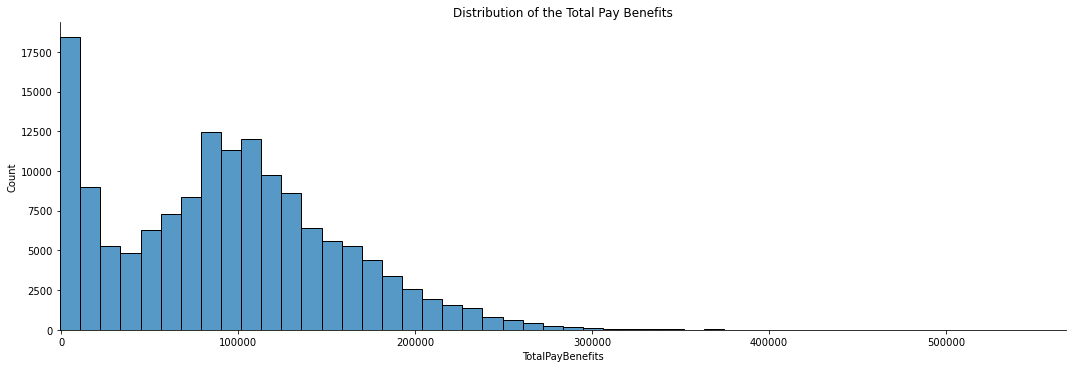

In [67]:
# Histogram of the Total Pay Benefits

sns.displot(df['TotalPayBenefits'],kde=False,bins = 50,aspect=3,)
plt.title("Distribution of the Total Pay Benefits")
plt.margins(x=0)


<AxesSubplot:xlabel='Year', ylabel='TotalPayBenefits'>

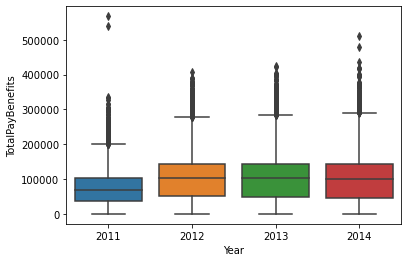

In [33]:
sns.boxplot(x=df["Year"],y=df["TotalPayBenefits"])